### André Marx Puente Arévalo

# Tarea 3 

Se deberá entregar su tarea en un notebook de Jupyter.

**1) Simulación Bootstrap :: n-ésimo estadístico de orden (Máximo)**

Usando los datos `DATOS_SESGADOS.csv`, utilice bootstrap para estimar el intervalo de confianza del n-ésimo estadístico de orden (el máximo) con un nivel de confianza del 95%. Utilice una semilla para replicar sus resultados y 10,000 simulaciones.

Realice un histograma de los datos y grafique lineas verticales para el intervalo de confianza encontrado.

¿Si realiza más simulaciones, obtendrá un mejor resultado? Argumente su respuesta.
Con base en los puntos anteriores, indique si su intervalo de confianza es adecuado.

*Extra :: ¿Conoce alguna distribución que modelo los datos? Si es así, ajuste dicha distribución estimando por máximo versomilitud. Realice una prueba Kolmogorov-Smirnov con la función `scipy.stats.ks_2samp` para determinar si es el ajuste es válido a un nivel de significancia del 95%*

**2) Simulación Bootstrap :: Rango Intercuartilico**

Usando los datos `DATOS_BIMODALES.csv`, utilice bootstrap para estimar el intervalo de confianza del rango intercuartílico con un nivel de confianza del 90%. Utilice una semilla para replicar sus resultados y 10,000 simulaciones.

Realice un histograma de los datos y grafique lineas verticales para el intervalo de confianza encontrado.

¿Si realiza más simulaciones, obtendrá un mejor resultado? Argumente su respuesta.
Con base en los puntos anteriores, indique si su intervalo de confianza es adecuado.

*Extra :: ¿Conoce alguna distribución que modelo los datos? Si es así, ajuste dicha distribución estimando por máximo versomilitud. Realice una prueba Kolmogorov-Smirnov con la función `scipy.stats.ks_2samp` para determinar si es el ajuste es válido a un nivel de significancia del 90%*

**3) Bosques Aleatorios :: Iris**

Usando los datos `iris.csv`, realice una implementación para emular un bosque aleatorio usando arboles de decisión con `sklearn.tree.DecisionTreeClassifier`. 

Para esto siga los siguientes pasos.

1. Defina el número de árboles (`n_estimators`) y el número de covariables (`max_features`) a usar en cada árbol.

2. Seleccione de manera uniforme y aleatoria las covariables a utilizar, así como los registros. 
Para los registros, utilice un remuestro con reemplazo y posteriormente elimine los duplicados. 

3. Entrene con los datos del paso anterior y guarde el arbol en una lista.

4. Repita los pasos 2) y 3) hasta haber entrenado `n_estimators` árboles de decisión de manera aleatoria.
Al conjunto de estos árboles de decisión le llamaremos modelo de Bosque Aleatorio.

5. Estime la precisión de su modelo de Bosque Aleatorio con todo el conjunto de datos.
Para estimar la precisión, deberá estimar sus datos en cada uno de los árboles de su modelo y posteriormente promediar la precisión.

Utilice una semilla para replicar sus resultados. 

Realice el mismo procedimiento, pero modificando el paso 2) para permitir que existan registros repetidos. 
Finalmente compare la precisión de ambos modelos con una gráfica de barras horizontal.

**4) Bosques Aleatorios :: Breast Cancer Coimbra**

Usando los datos `Breast_Cancer_Coimbra.csv`, utilice `sklearn.ensemble.RandomForestClassifier` para realizar un modelo de bosques aleatorios.
Si desean conocer más acerca del conjunto de datos visiten https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

Coloque una semilla para replicar sus resultados al inicio de cada inciso. Además, para estimar la precisión utilice KFoldCV con K = 10.

- Realice un modelo con parámetros por defecto y modifique únicamente el criterio de división `criterion`. Realice una gráfica (de barras) de la precisión en función de criterio de división.

- Realice un modelo modificando únicamente el número de covariables (`max_features`).
Realice una gráfica (de dispersión) de la precisión en función del número de covariables (de 1 a P covariables).

- Realice un modelo modificando únicamente el número de árboles (`n_estimators`).
Realice una gráfica (de lineas) de la precisión en función del número de árboles (de 10 a 150 árboles con saltos de 5).

Con base en lo observado en los incisos anteriores, realice un modelo modificando los parámetros a su elección.
Estime la precisión del modelo utilizando KFoldCV con K = 10 y realice una gráfica (de barras horizontales) de la precisión en función de cada uno de los 4 modelos. 

Tomando el mejor modelo como aquel que tiene la precisión más alta, realice una gráfica (de barras horizontales) de la importancia de las variables. 

**3) Bosques Aleatorios :: Iris**

Usando los datos `iris.csv`, realice una implementación para emular un bosque aleatorio usando arboles de decisión con `sklearn.tree.DecisionTreeClassifier`. 

Para esto siga los siguientes pasos.

1. Defina el número de árboles (`n_estimators`) y el número de covariables (`max_features`) a usar en cada árbol.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics         import accuracy_score
from sklearn.tree            import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree # Funciones de clase Tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Leemos los datos y los mostramos
datos = pd.read_csv("iris.csv")
datos.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# Defimos el numero de arboles
n_estimators = 10

# Defino el número máximo de covariables a usar en cada arbol
max_features = 3

2. Seleccione de manera uniforme y aleatoria las covariables a utilizar, así como los registros. 
Para los registros, utilice un remuestro con reemplazo y posteriormente elimine los duplicados. 

Primero seleccionaremos las covariables a utilizar:

In [4]:
# Fijamos una semilla para poder replicar los datos
np.random.seed(123)

# Defino un vector con el nombre de mis 4 covariables
columnas = np.array(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])

# Hacemos que seleccione de manera aleatoria y uniforme las covariables
covariables_selec = np.random.choice(columnas, np.random.randint(1, max_features+1), replace = False)
print("Las covariables seleccionadas son:")
print(covariables_selec)

Las covariables seleccionadas son:
['Petal_Width' 'Sepal_Length' 'Petal_Length']


Ahora, realizaremos un remuestreo sobre los registros de las covariables seleccionadas:

In [5]:
# Primero creamos un indice
data = pd.DataFrame({'Indice':np.arange(datos.shape[0]).T})

# Creamos la matriz que conetnga todos los datos que se pueden remuestrear
for i in covariables_selec: data[f'{i}'] = datos[i]

# Agregamos nuestra variable de respuesta
data['Species'] = datos['Species']
data.tail()

,Indice,Petal_Width,Sepal_Length,Petal_Length,Species
145,145,2.3,6.7,5.2,virginica
146,146,1.9,6.3,5.0,virginica
147,147,2.0,6.5,5.2,virginica
148,148,2.3,6.2,5.4,virginica
149,149,1.8,5.9,5.1,virginica


Agregamos la columna "Indice" con el propósito de tener una manera con la que podamos identificar cada registro (llave primaria) y al momento de hacer el remuestreo poder quitar los duplicados.

In [6]:
# Fijamos una semilla para poder replicar los datos
np.random.seed(123)

# Hacemos un remuestreo con reemplazo sobre los indices
n = data.shape[0]     #Indica el tamaño de la muestra que se va a remuestrear
indices_remuestrados = np.random.choice(np.arange(datos.shape[0]).T, n, replace =  True)

# Ya que solo remuestreamos los datos, ahora vamos a quitar los duplicados
indices_unicos = pd.DataFrame({'Indice':np.unique(indices_remuestrados).T})
print(f"La cantidad de registros no repetidos son: {indices_unicos.shape[0]} de {n}")

# Usando estos indices remuestreados y unicos, traemos los registros (es decir, hacemos un cruce)
data_unica = pd.merge(left = indices_unicos, right = data, how = "inner", left_on = "Indice", right_on = "Indice")
data_unica.tail()

La cantidad de registros no repetidos son: 97 de 150


,Indice,Petal_Width,Sepal_Length,Petal_Length,Species
92,140,2.4,6.7,5.6,virginica
93,141,2.3,6.9,5.1,virginica
94,145,2.3,6.7,5.2,virginica
95,146,1.9,6.3,5.0,virginica
96,149,1.8,5.9,5.1,virginica


3. Entrene con los datos del paso anterior y guarde el árbol en una lista.

In [7]:
# Los datos para realizar el ajuste son:
covariables = data_unica.values[:,1:data_unica.shape[1]-1]
y = data_unica.values[:, data_unica.shape[1]-1]

print("Matriz de Diseño:")
print(covariables[0:5,:])
print("")
print("Y Real")
print(y[0:5])

# Entrenamos nuestro modelo
modelo_arbol = DecisionTreeClassifier(random_state=123)
arbol = modelo_arbol.fit(covariables, y)

# Lo guardo en una lista
arbol_list = [arbol]

print("")
print(arbol_list)

Matriz de Diseño:
[[0.2 5.1 1.4]
 [0.2 4.9 1.4]
 [0.2 4.7 1.3]
 [0.2 4.6 1.5]
 [0.3 4.6 1.4]]

Y Real
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')]


Lo siguiente son cosas extras que el problema no pedia:

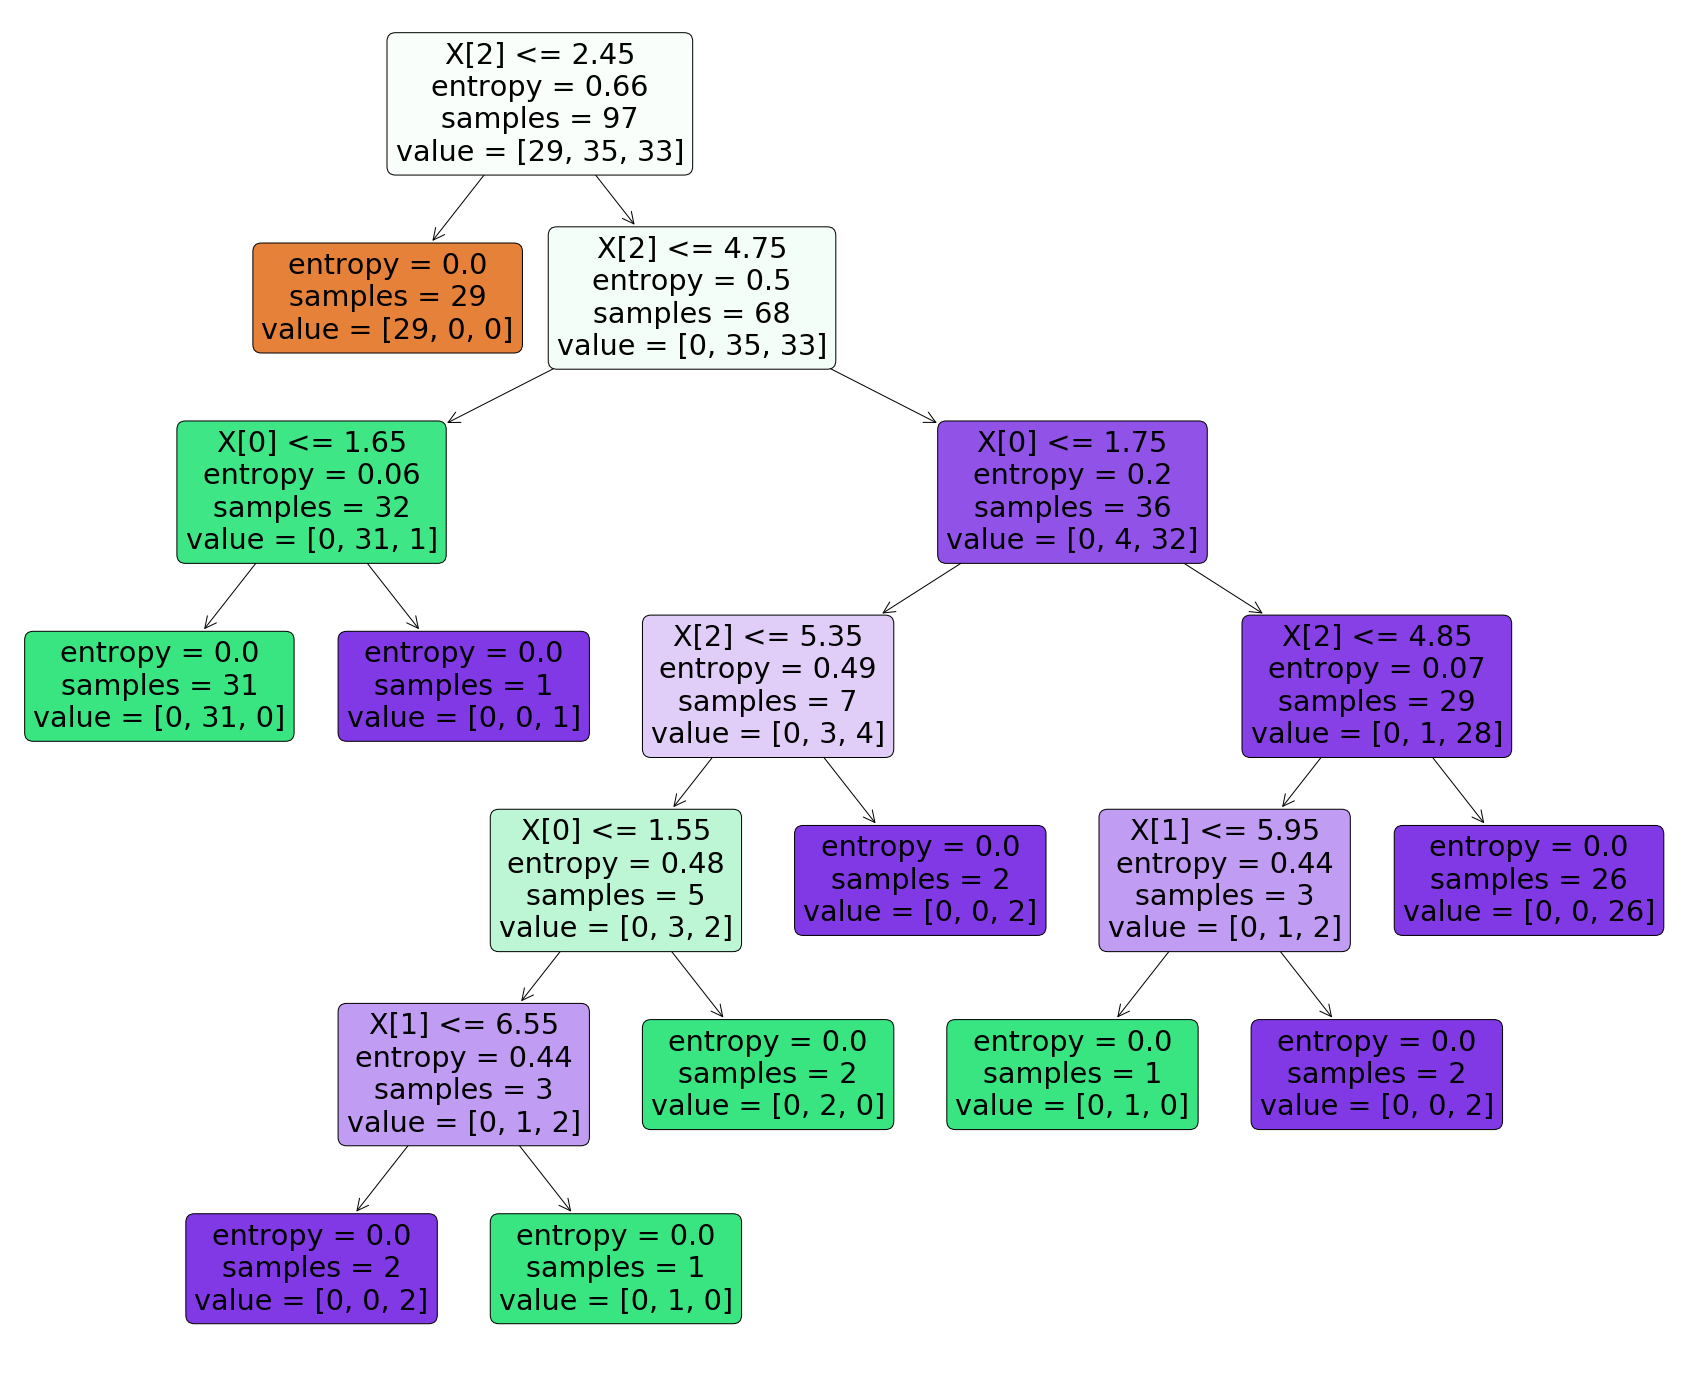

In [8]:
# Graficamos el arbol
plt.figure( figsize=(30,25) )                                      # Indicamos el tamaño de la gráfica
plot_tree(modelo_arbol, filled=True, rounded=True, precision=2 )  # Graficamos el árbol de decisión 
plt.show()     

In [9]:
# Algunos detalles del arbol de decisión
print( modelo_arbol.classes_ )
print( modelo_arbol.feature_importances_ ) 
print( modelo_arbol.n_classes_ ) 
print( modelo_arbol.criterion ) 

['setosa' 'versicolor' 'virginica']
[0.07376082 0.0413602  0.88487898]
3
gini


In [10]:
# Estimamos nuestro valor Y
y_estimada = modelo_arbol.predict( covariables )

print("Precisión del modelo")
print( accuracy_score(y, y_estimada) * 100  )

Precisión del modelo
100.0


4. Repita los pasos 2) y 3) hasta haber entrenado `n_estimators` árboles de decisión de manera aleatoria.
Al conjunto de estos árboles de decisión le llamaremos modelo de Bosque Aleatorio.

En este for vamos a calcular las Y's estimadas y las reales de cada modelo que nos serán de utilidad para el siguiente inciso.

In [11]:
# Fijamos semilla para replicar datos
np.random.seed(4)

# Inicializo la lista que guardara los modelos
modelos_bosque = []

# Inicializo la lista que guardara a los arboles
bosque_aleatorio = []

# Inicializo la lista que guardara las Y's estimadas
Ys_estimadas = []

# Inicializo la lista que guardara las Y's reales
Ys_reales = []

for r in range(0, n_estimators):
    
    # Hacemos que seleccione de manera aleatoria y uniforme las covariables
    covariables_selec = np.random.choice(columnas, np.random.randint(1, max_features+1), replace = False)
    
    # Primero creamos un indice
    data = pd.DataFrame({'Indice':np.arange(datos.shape[0]).T})

    # Creamos la matriz que conetnga todos los datos que se pueden remuestrear
    for i in covariables_selec: data[f'{i}'] = datos[i]

    # Agregamos nuestra variable de respuesta
    data['Species'] = datos['Species']
    
    # Hacemos un remuestreo con reemplazo sobre los indices
    s = data.shape[0]     #Indica el tamaño de la muestra que se va a remuestrear
    indices_remuestrados = np.random.choice(np.arange(datos.shape[0]).T, s, replace =  True)

    # Ya que solo remuestreamos los datos, ahora vamos a quitar los duplicados
    indices_unicos = pd.DataFrame({'Indice':np.unique(indices_remuestrados).T})

    # Usando estos indices remuestreados y unicos, traemos los registros (es decir, hacemos un cruce)
    data_unica = pd.merge(left = indices_unicos, right = data, how = "inner", left_on = "Indice", right_on = "Indice")
    
    # Los datos para realizar el ajuste son:
    covariables = data_unica.values[:,1:data_unica.shape[1]-1]
    y = data_unica.values[:, data_unica.shape[1]-1]
    
    # Entrenamos nuestro modelo
    modelo_arbol = DecisionTreeClassifier()
    arbol = modelo_arbol.fit(covariables, y)
    
    # Obtenemos la y estimada del modelo
    y_estimada = modelo_arbol.predict(covariables)
    
    # Llenamos las listas
    modelos_bosque.append(modelo_arbol)
    bosque_aleatorio.append(arbol)
    Ys_estimadas.append(y_estimada)
    Ys_reales.append(y)

print("El Bosque Aleatorio es:")
print(" ")
print(bosque_aleatorio[0:5])

El Bosque Aleatorio es:
 
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                      

5. Estime la precisión de su modelo de Bosque Aleatorio con todo el conjunto de datos.
Para estimar la precisión, deberá estimar sus datos en cada uno de los árboles de su modelo y posteriormente promediar la precisión.

Utilice una semilla para replicar sus resultados. 

In [12]:
# Defino un vector en el que guardaré todas las precisiones de los modelos
precisiones = np.zeros(n_estimators)

# Haremos un ciclo for que calcule la precision de cada modelo
for i in range(0, n_estimators):
    precisiones[i] = accuracy_score(Ys_reales[i], Ys_estimadas[i]) * 100

# Calculamos la precision del bosque aleatorio
identidad = np.ones(n_estimators)

precision_bosque = np.dot(precisiones, identidad)*(1/n_estimators)

print("La precision del bosque aleatorio sin repetidos es:")
print(precision_bosque)

La precision del bosque aleatorio sin repetidos es:
96.35416666666669


Realice el mismo procedimiento, pero modificando el paso 2) para permitir que existan registros repetidos. 
Finalmente compare la precisión de ambos modelos con una gráfica de barras horizontal.

In [13]:
# Fijamos semilla para replicar datos
np.random.seed(999)

# Inicializo la lista que guardara los modelos
modelos_bosque2 = []

# Inicializo la lista que guardara a los arboles
bosque_aleatorio2 = []

# Inicializo la lista que guardara las Y's estimadas
Ys_estimadas2 = []

# Inicializo la lista que guardara las Y's reales
Ys_reales2 = []

for r in range(0, n_estimators):
    
    # Hacemos que seleccione de manera aleatoria y uniforme las covariables
    covariables_selec = np.random.choice(columnas, np.random.randint(1, max_features+1), replace = False)
    
    # Primero creamos un indice
    data = pd.DataFrame({'Indice':np.arange(datos.shape[0]).T})

    # Creamos la matriz que conetnga todos los datos que se pueden remuestrear
    for i in covariables_selec: data[f'{i}'] = datos[i]

    # Agregamos nuestra variable de respuesta
    data['Species'] = datos['Species']
    
    # Hacemos un remuestreo con reemplazo sobre los indices
    s = data.shape[0]     #Indica el tamaño de la muestra que se va a remuestrear
    indices_remuestreados = pd.DataFrame({'Indice' : np.random.choice(np.arange(datos.shape[0]).T, s, replace =  True)})

    # Usando estos indices remuestreados, traemos los registros (es decir, hacemos un cruce)
    data_remuestreo = pd.merge(left = indices_remuestreados, right = data, how = "inner", left_on = "Indice", right_on = "Indice")
    
    # Los datos para realizar el ajuste son:
    covariables = data_remuestreo.values[:,1:data_remuestreo.shape[1]-1]
    y = data_remuestreo.values[:, data_remuestreo.shape[1]-1]
    
    # Entrenamos nuestro modelo
    modelo_arbol = DecisionTreeClassifier()
    arbol = modelo_arbol.fit(covariables, y)
    
    # Obtenemos la y estimada del modelo
    y_estimada = modelo_arbol.predict(covariables)
    
    # Llenamos las listas
    modelos_bosque2.append(modelo_arbol)
    bosque_aleatorio2.append(arbol)
    Ys_estimadas2.append(y_estimada)
    Ys_reales2.append(y)

In [14]:
# Defino un vector en el que guardaré todas las precisiones de los modelos
precisiones2 = np.zeros(n_estimators)

# Haremos un ciclo for que calcule la precision de cada modelo
for i in range(0, n_estimators):
    precisiones2[i] = accuracy_score(Ys_reales2[i], Ys_estimadas2[i]) * 100
precision_bosque2 = np.dot(precisiones2, identidad)*(1/n_estimators)
print("La precision del bosque aleatorio con repetidos es:")
print(precision_bosque2)

La precision del bosque aleatorio con repetidos es:
92.86666666666667


Grafico las precisiones de los dos árboles:

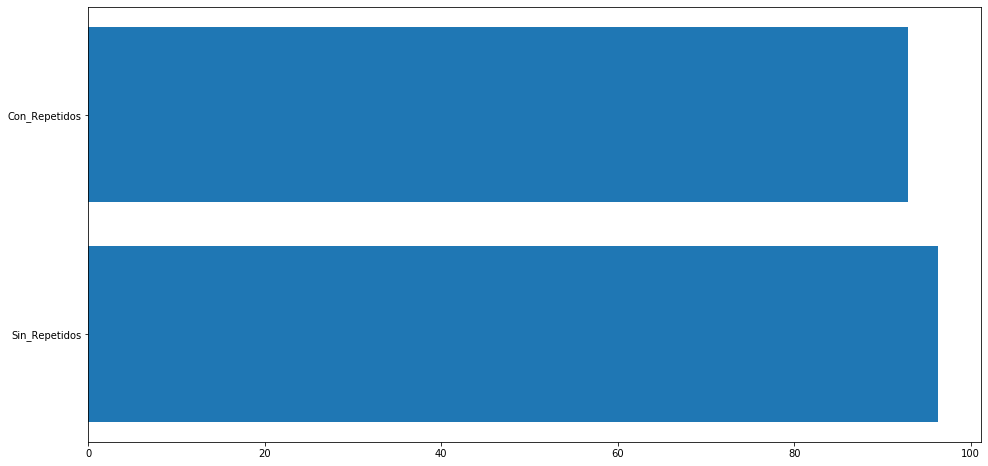

In [15]:
# Defino las cosas que quiero graficar
Nombres = np.array(["Sin_Repetidos", "Con_Repetidos"])
Precisiones_totales = np.array([precision_bosque, precision_bosque2]).T

# Grafica de la importancia de las variables
plt.figure( figsize=(16,8) )
plt.barh( Nombres, Precisiones_totales )
plt.show()

**4) Bosques Aleatorios :: Breast Cancer Coimbra**

Usando los datos `Breast_Cancer_Coimbra.csv`, utilice `sklearn.ensemble.RandomForestClassifier` para realizar un modelo de bosques aleatorios.
Si desean conocer más acerca del conjunto de datos visiten https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

Coloque una semilla para replicar sus resultados al inicio de cada inciso. Además, para estimar la precisión utilice KFoldCV con K = 10.

In [16]:
# Importamos las Bibliotecas
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas

from matplotlib.colors       import ListedColormap 
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv("Breast_Cancer_Coimbra.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


- Realice un modelo con parámetros por defecto y modifique únicamente el criterio de división `criterion`. Realice una gráfica (de barras) de la precisión en función de criterio de división.

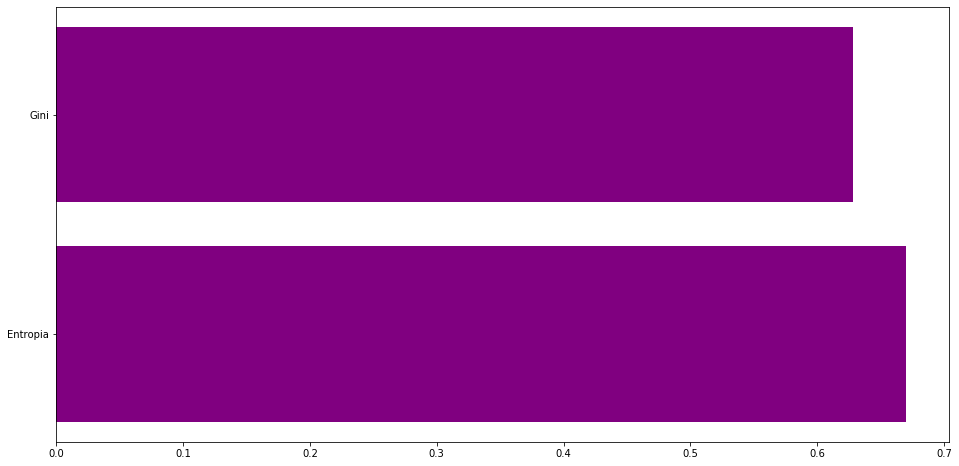

In [28]:
# Fijamos semilla para replicar resultados
np.random.seed(123)

# Definimos la matriz de covariables
X = data.iloc[:,0:9]

# Definimos la matriz de respuesta
Y = data.loc[:,'Classification']

# Ajustamos el modelo
modelo_rf_c1 = RandomForestClassifier(criterion = 'entropy')
modelo_rf_c2 = RandomForestClassifier(criterion = 'gini')  # Este es el criterio por default

# Calculamos la precision de los modelos
precision_cv1 = cross_val_score(estimator = modelo_rf_c1, X = X, y = Y, cv = 10)
precision_cv2 = cross_val_score(estimator = modelo_rf_c2, X = X, y = Y, cv = 10)

# Hacemos la grafica de barras
Nombres = np.array(["Entropia", "Gini"])
Precisiones_totales = np.array([np.mean(precision_cv1), np.mean(precision_cv2)]).T
plt.figure( figsize=(16,8) )
plt.barh( Nombres, Precisiones_totales, color = "purple" )
plt.show()

- Realice un modelo modificando únicamente el número de covariables (`max_features`).
Realice una gráfica (de dispersión) de la precisión en función del número de covariables (de 1 a P covariables).

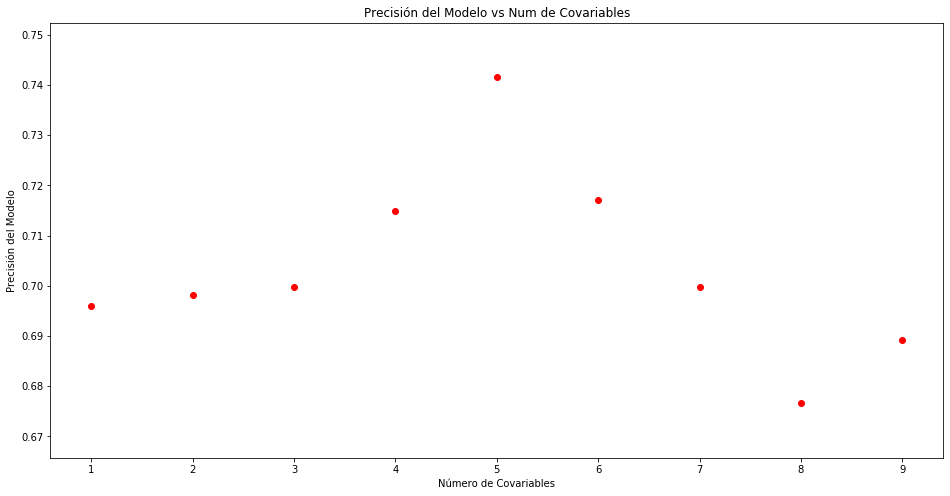

In [27]:
# Fijamos semilla para replicar resultados
np.random.seed(123)

# Realizamos un for en el que vamos a crear bosques aleatorios con un max_features = i con i=1,...9

#Inicializamos una lista que guardara las precisiones
Preci5ion5 = []

for i in range(1, 10):
    # Ajustamos el modelo
    modelo_rf_max = RandomForestClassifier(max_features = i)
    
    # Calculamos la precision
    Preci5ion5.append(np.mean(cross_val_score(estimator = modelo_rf_max, X = X, y = Y, cv = 10)))

# Hacemos la grafica de dispersion
T = range(1,10)
plt.figure( figsize=(16,8) )
plt.title('Precisión del Modelo vs Num de Covariables')
plt.xlabel('Número de Covariables')
plt.ylabel('Precisión del Modelo')
plt.scatter( x = list(T), y = Preci5ion5, color = "Red")
plt.show()

- Realice un modelo modificando únicamente el número de árboles (`n_estimators`).
Realice una gráfica (de lineas) de la precisión en función del número de árboles (de 10 a 150 árboles con saltos de 5).

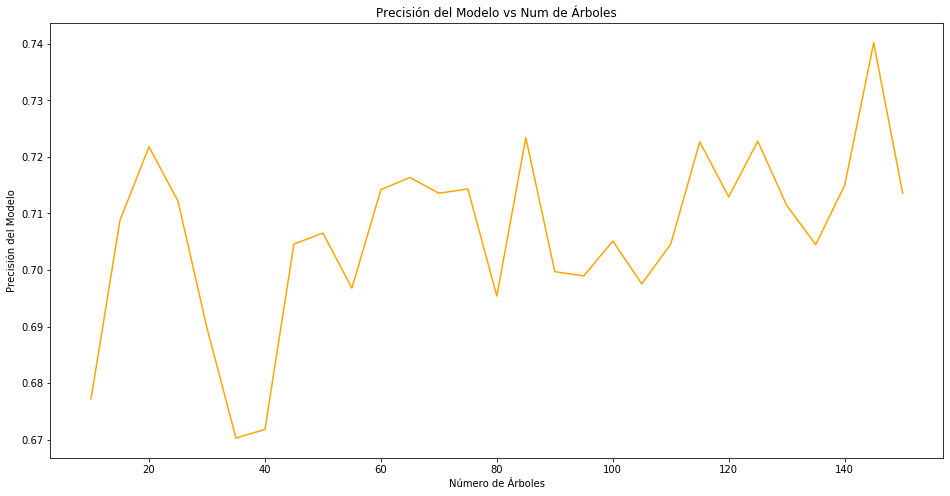

In [59]:
# Fijamos semilla para replicar resultados
np.random.seed(123)

# Creamos una lista que guarde el numero de estimadores
n = list(range(10,155,5))

# Inicializamos una lista que tendra las precisiones de cada modelo
predic = []

for i in n:
    # Ajusta el bosque
    modelo_rf_n = RandomForestClassifier(n_estimators = i)
    
    # Guarda la precision
    predic.append(np.mean(cross_val_score(estimator = modelo_rf_n, X = X, y = Y, cv = 10)))

# Hacemos la grafica
plt.figure( figsize=(16,8) )
plt.title('Precisión del Modelo vs Num de Árboles')
plt.xlabel('Número de Árboles')
plt.ylabel('Precisión del Modelo')
plt.plot(n, predic, color = "Orange")
plt.show()

Con base en lo observado en los incisos anteriores, realice un modelo modificando los parámetros a su elección.
Estime la precisión del modelo utilizando KFoldCV con K = 10 y realice una gráfica (de barras horizontales) de la precisión en función de cada uno de los 4 modelos. 

Tomando el mejor modelo como aquel que tiene la precisión más alta, realice una gráfica (de barras horizontales) de la importancia de las variables. 

La precision de mi modelo es: 0.7596736596736596
El maximo del 1) es: 0.6701631701631701
El maximo del 2) es: 0.7414918414918416
El maximo del 3) es: 0.7402097902097903
###########################################################################################################


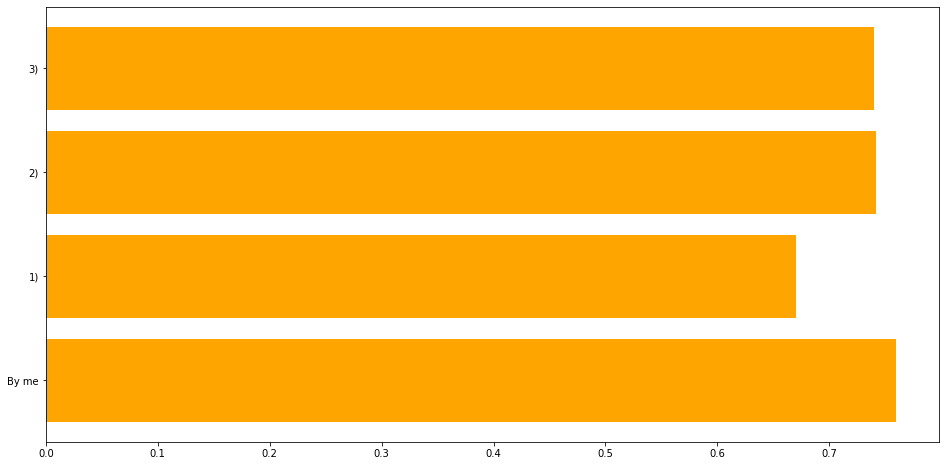

In [70]:
# Fijamos semilla para replicar resultados
np.random.seed(123)

# Creamos nuestro modelo
modelo_rf_byme = RandomForestClassifier(n_estimators = 20, max_features = 4, criterion = 'entropy' )

# Calculamos la precision de nuestro modelo
precision_byme = np.mean(cross_val_score(estimator = modelo_rf_byme, X = X, y = Y, cv = 10))
print(f"La precision de mi modelo es: {precision_byme}")
print(f"El maximo del 1) es: {np.mean(precision_cv1)}")
print(f"El maximo del 2) es: {max(Preci5ion5)}")
print(f"El maximo del 3) es: {max(predic)}")
print("###########################################################################################################")

# Graficamos
Nombres = np.array(["By me", "1)", "2)", "3)"])
Precisiones_totales = np.array([precision_byme, np.mean(precision_cv1), max(Preci5ion5), max(predic)]).T
plt.figure( figsize=(16,8) )
plt.barh( Nombres, Precisiones_totales, color = "Orange" )
plt.show()